In [6]:
#Importing the packages
import pandas as pd
import numpy as np
from sklearn. feature_extraction. text import CountVectorizer
from sklearn. model_selection import train_test_split
from sklearn. tree import DecisionTreeClassifier
import string
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [7]:
import nltk
import re
#nltk. download('stopwords')
from nltk. corpus import stopwords
stopword=set(stopwords.words('english'))
stemmer = nltk. SnowballStemmer("english")

In [8]:
data = pd.read_csv("labeled_data.csv")
#To preview the data
print(data. head())

   Unnamed: 0  count  hate_speech  offensive_language  neither  class  \
0           0      3            0                   0        3      2   
1           1      3            0                   3        0      1   
2           2      3            0                   3        0      1   
3           3      3            0                   2        1      1   
4           4      6            0                   6        0      1   

                                               tweet  
0  !!! RT @mayasolovely: As a woman you shouldn't...  
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...  
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...  
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...  
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...  


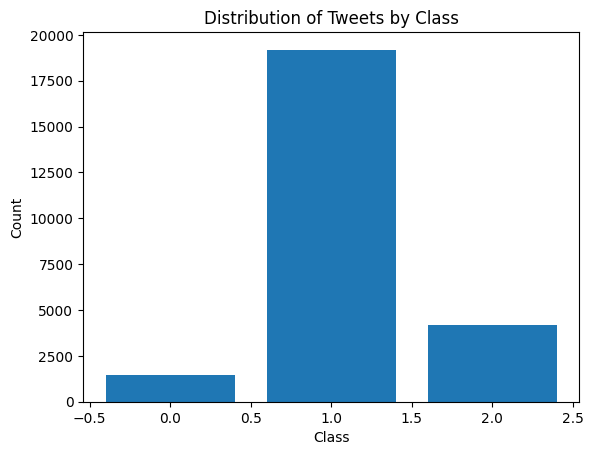

In [11]:
import matplotlib.pyplot as plt
class_counts = data['class'].value_counts()
plt.bar(class_counts.index, class_counts.values)
plt.title('Distribution of Tweets by Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


In [12]:
data["labels"] = data["class"]. map({0: "Hate Speech", 1: "Offensive Speech", 2: "No Hate and Offensive Speech"})
data = data[["tweet", "labels"]]
print(data. head())

                                               tweet  \
0  !!! RT @mayasolovely: As a woman you shouldn't...   
1  !!!!! RT @mleew17: boy dats cold...tyga dwn ba...   
2  !!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...   
3  !!!!!!!!! RT @C_G_Anderson: @viva_based she lo...   
4  !!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...   

                         labels  
0  No Hate and Offensive Speech  
1              Offensive Speech  
2              Offensive Speech  
3              Offensive Speech  
4              Offensive Speech  


In [13]:
def clean (text):
    text = str (text). lower()
    text = re. sub('[.?]', '', text) 
    text = re. sub('https?://\S+|www.\S+', '', text)
    text = re. sub('<.?>+', '', text)
    text = re. sub('[%s]' % re. escape(string. punctuation), '', text)
    text = re. sub('\n', '', text)
    text = re. sub('\w\d\w', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ". join(text)
    text = [stemmer. stem(word) for word in text. split(' ')]
    text=" ". join(text)
    return text
data["tweet"] = data["tweet"].apply(clean)

C:\Users\DELL\AppData\Local\Temp\ipykernel_20580\2226179781.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["tweet"] = data["tweet"].apply(clean)


In [14]:
x = np. array(data["tweet"])
y = np. array(data["labels"])
cv = CountVectorizer()
X = cv. fit_transform(x)
# Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [15]:
#Model building
model = DecisionTreeClassifier()
#Training the model
model. fit(X_train,y_train)

DecisionTreeClassifier()

In [16]:
#Testing the model
y_pred = model. predict (X_test)
y_pred

array(['Offensive Speech', 'Offensive Speech', 'Offensive Speech', ...,
       'No Hate and Offensive Speech', 'Offensive Speech',
       'Offensive Speech'], dtype=object)

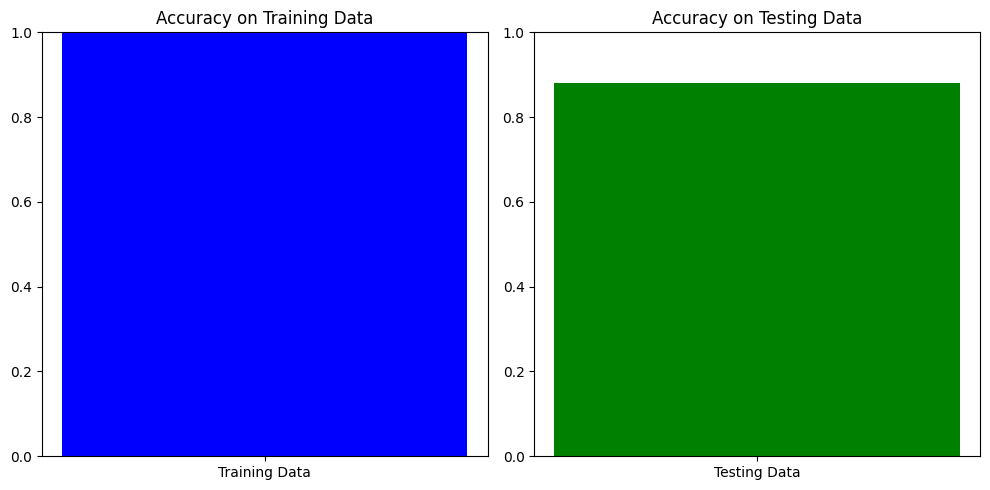

In [17]:
import matplotlib.pyplot as plt

#Training the model
model.fit(X_train, y_train)

#Testing the model
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

#Accuracy Score of our model
from sklearn.metrics import accuracy_score
train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)

#Create a bar chart to show the accuracy of the model on the training and testing data
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].bar(['Training Data'], [train_accuracy], color=['blue'])
axs[0].set_ylim(0,1)
axs[0].set_title('Accuracy on Training Data')

axs[1].bar(['Testing Data'], [test_accuracy], color=['green'])
axs[1].set_ylim(0,1)
axs[1].set_title('Accuracy on Testing Data')

fig.tight_layout()
plt.show()


In [18]:
#Accuracy Score of our model
from sklearn. metrics import accuracy_score
print (accuracy_score (y_test,y_pred))

0.8788360435261034


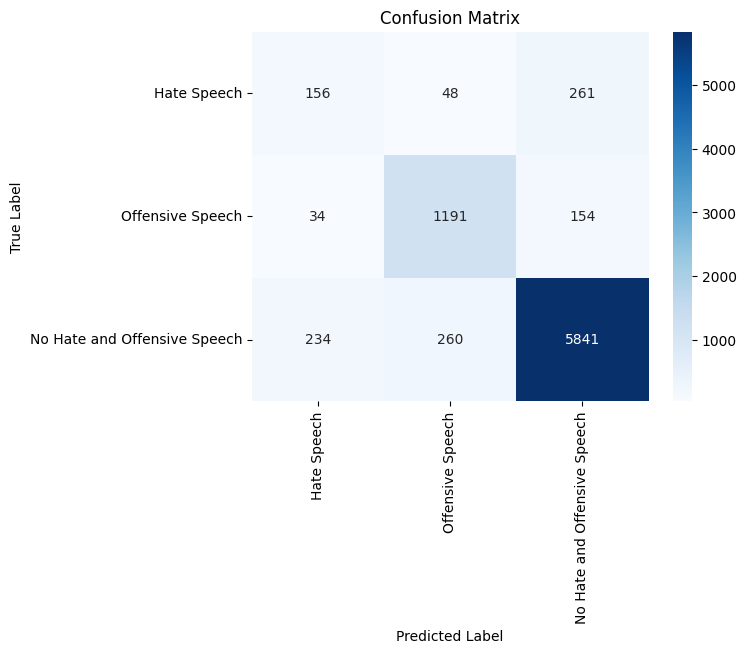

In [19]:
import matplotlib.pyplot as plt
# Get the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', xticklabels=['Hate Speech', 'Offensive Speech', 'No Hate and Offensive Speech'], yticklabels=['Hate Speech', 'Offensive Speech', 'No Hate and Offensive Speech'])

# Add labels and title
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#Predicting the outcome
inp = "The shit just blows me..claim you so faithful and down for somebody but still fucking with hoes!"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['Offensive Speech']


In [ ]:
inp = "It is really awesome"
inp = cv. transform([inp]). toarray()
print(model. predict(inp))

['No Hate and Offensive Speech']


In [ ]:
inp = "you piece of shit, let me teach you manners"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['Offensive Speech']


In [ ]:
inp = "Preeth you look fucking good today"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['No Hate and Offensive Speech']


In [25]:
inp = "You sc/st people are such pieces of shit misusing our roles with useless reservations"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['Offensive Speech']


In [26]:
inp = "momma said no pussy cats inside my doghouse"
inp = cv.transform([inp]).toarray()
print(model.predict(inp))

['No Hate and Offensive Speech']
